## Pattern Recognition - Electrical & Computer Engineering
## 2023 Aristotle University Thessaloniki
### Authors: Antonios Antoniou 9482, Konstantinos Kalamaras 9716
### Emails: aantonii@ece.auth.gr, kkalamar@ece.auth.gr
#### Deliverables A, B, C of the semester assignment.

In [141]:
# First, we load the data. We then have to:
#  - Split it into the training and testing set (50%-50%)
#  - Split each of those sets into the features and labels (which is the last column)

import numpy as np
from typing import Union, List, Dict, Tuple
from sklearn import model_selection
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay

filename = "dataset.csv"
ds = np.loadtxt(filename, delimiter=",", dtype=np.float64)
train_set, test_set = model_selection.train_test_split(ds, test_size=0.5, shuffle=True, random_state=0)
X_train, y_train = train_set[:, 0:2], train_set[:, 2]
X_test, y_test = test_set[:, 0:2], test_set[:, 2]

## Question A (Bayes Classifier assuming Gaussian distribution)

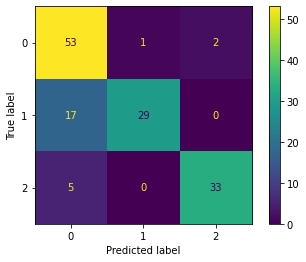

In [74]:
# The Gaussian Naive Bayes classifier, by default assumes different covariance matrices for each class.
# See here: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# The `var_` attribute keeps the different variances of each feature, for each class.
# The rest of the entries of the covariance matrix (i.e. {i,j:i!=j}) are zero,
# because Naive Bayes assumes iid features.

""" !
We will rule out the actual algorithm used in the background by sklearn
(Since we need one implementation where covariance matrices are the same for all classes, and one with different ones).
We build an example in order to test the rest of the question.
We still need to visualize the results, i.e. show the decision bounds and misclassified samples.
! """

from sklearn.naive_bayes import GaussianNB

gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)

p = gauss_model.predict(X_test)
cm = metrics.confusion_matrix(y_test, p)
cmd = metrics.ConfusionMatrixDisplay(cm)
cmd.plot()


In [150]:
'''
Splits the test samples into correctly placed and misclassified ones.
'''
def split_correct_incorrect(X_test, y_test, y_pred) -> Tuple[List,List,List,List]:
    filter_hit = [y_test == y_pred]
    filter_miss = [y_test != y_pred]
    X_c, y_c = X_test[tuple(filter_hit)], y_test[tuple(filter_hit)]
    X_miss, y_miss = X_test[tuple(filter_miss)], y_pred[tuple(filter_miss)]
    return X_c, y_c, X_miss, y_miss

'''
Uses the accuracy score in order to calculate the classification error.
'''
def get_classification_error(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    return (1 - acc).round(3) * 100

'''
Plots the split samples on the plot of a decision boundary.
Adds text on the bottom right, displaying the classification error.
'''
def plot_on_boundary_display(plot:DecisionBoundaryDisplay, X_c, y_c, X_miss, y_miss, cerror):
    plot.ax_.scatter(X_c[:,0], X_c[:,1], c=y_c, marker=".", s=100, edgecolor="black")
    plot.ax_.scatter(X_miss[:,0], X_miss[:,1], c=y_miss, marker="x")
    plot.ax_.text(
        5., -1, s=f"Class. error : {cerror:.1f}%",
        style="oblique", bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 3}
    )

In [146]:
# Here, we visualize the data for each classifier:
# - The decision boundary, and
# - Correctly and incorrectly classified samples.

"""
For a Bayes classifier, plots the decision boundaries.
Then plots the test samples that were properly classified.
Adds the misclassified samples to the plot, using a different marker.
Adds the average accuracy score of the whole model.
"""
def plot_bayes_model(model:GaussianNB, X_test, y_test, title):
    # Each class gets its own color.
    # If a test sample has been misclassified, we assign a different symbol for it.
    # For that purpose, we are splitting the test samples into correctly and incorrectly classified ones.
    y_pred = model.predict(X_test)
    X_c, y_c, X_miss, y_miss = split_correct_incorrect(X_test, y_test, y_pred)
    classification_error = get_classification_error(y_test, y_pred)

    # Plot the decision boundaries
    db_plot = DecisionBoundaryDisplay.from_estimator(model, X_test, grid_resolution=1200)
    plot_on_boundary_display(db_plot, X_c, y_c, X_miss, y_miss, classification_error)
    db_plot.ax_.set_title(title)

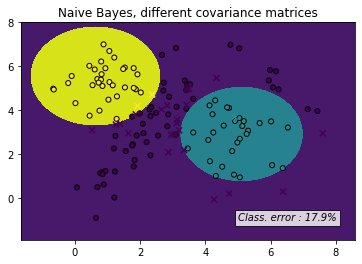

In [147]:
plot_bayes_model(gauss_model, X_test, y_test, "Naive Bayes, different covariance matrices")

## Question B (k-NN classifier for $i=\{1,...,10\}$)

In [148]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn_classifiers(X_train, y_train, k:Union[int, List[int]]) -> Dict[int, KNeighborsClassifier]:
    k = [k] if type(k) == int else k # If one int is passed, make it a list of one element.
    knnc = {}
    for n in k:
        knn_i = KNeighborsClassifier(n_neighbors=n)
        knn_i.fit(X_train, y_train)
        knnc[n] = knn_i
    return knnc

def plot_knn_classifier(model:KNeighborsClassifier, n_neighbors, X_test, y_test):
    y_pred = model.predict(X_test)
    X_c, y_c, X_miss, y_miss = split_correct_incorrect(X_test, y_test, y_pred)
    classification_error = get_classification_error(y_test, y_pred)

    db_plot = DecisionBoundaryDisplay.from_estimator(model, X_test, grid_resolution=200)
    plot_on_boundary_display(db_plot, X_c, y_c, X_miss, y_miss, classification_error)
    db_plot.ax_.set_title(f"KNeighborsClassifier using {n_neighbors} neighbor(s)")

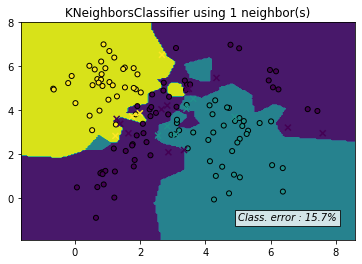

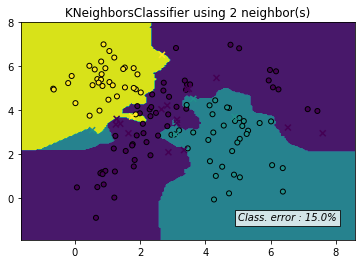

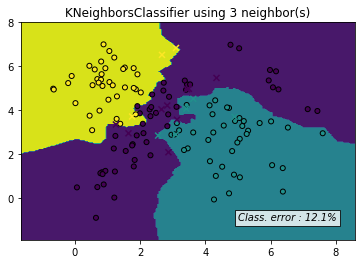

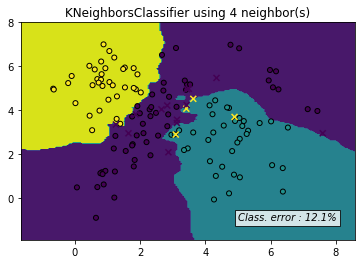

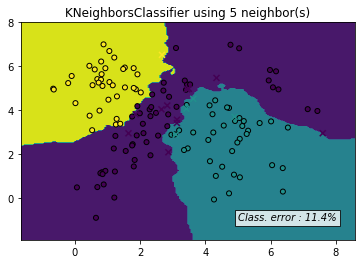

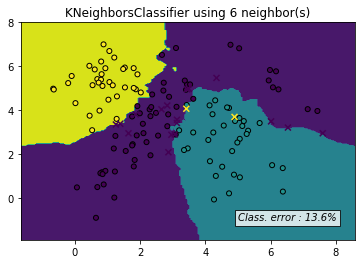

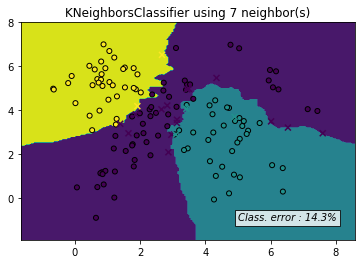

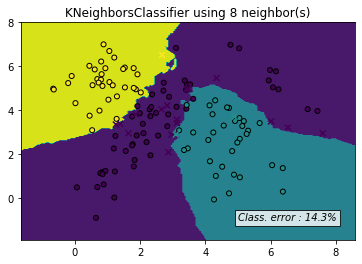

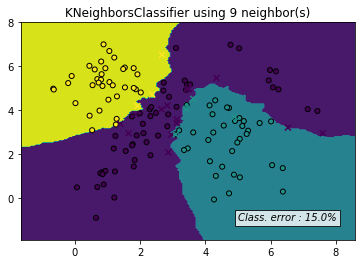

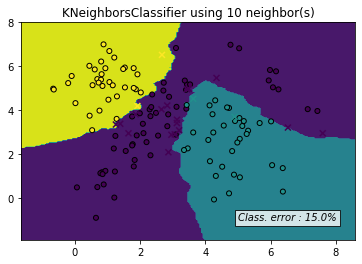

In [149]:
k_arr = [i for i in range(1,11)]
knns = train_knn_classifiers(X_train, y_train, k_arr)
for n,c in zip(knns.keys(), knns.values()):
    plot_knn_classifier(c, n, X_test, y_test)